<a href="https://colab.research.google.com/github/spoorthi2003/2216145_aiml-boot-camp/blob/main/suv_purchase(2).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
dataset='/content/SUV_Purchase.csv'
import pandas as pd
import numpy as np
df=pd.read_csv(dataset)
df.head()


,User ID,Gender,Age,EstimatedSalary,Purchased
0,15624510,Male,19,19000,0
1,15810944,Male,35,20000,0
2,15668575,Female,26,43000,0
3,15603246,Female,27,57000,0
4,15804002,Male,19,76000,0


In [ ]:
#feature engineering     #removing column
df=df.drop('User ID',axis=1)
df=df.drop('Gender',axis=1)

In [ ]:
df

,Age,EstimatedSalary,Purchased
0,19,19000,0
1,35,20000,0
2,26,43000,0
3,27,57000,0
4,19,76000,0
...,...,...,...
395,46,41000,1
396,51,23000,1
397,50,20000,1
398,36,33000,0


In [ ]:
'''#data preprocessing
from sklearn import preprocessing
#label encoding
LE=preprocessing.LabelEncoder()
#fitting it to our dataset
df.Gender=LE.fit_transform(df.Gender)
df.head()'''

'#data preprocessing\nfrom sklearn import preprocessing\n#label encoding\nLE=preprocessing.LabelEncoder()\n#fitting it to our dataset\ndf.Gender=LE.fit_transform(df.Gender)\ndf.head()'

In [ ]:
'''#visualization
import matlplotib.pyplot as plt
import saeborn as sns
WIDTH=10
HEIGHT=4
def plot_vs(frame,col1,col2,hue):
  plt.figure(figsize=(WIDTH,HEIGHT*2))
  sns.scatterplot(data=frame,x=col1,y=col2,hue=hue)
  plt.title(f"scatter plot|{col1} vs {col2}")
  plt.show()
plot_vs(df,'Age','EstimatedSalary','Gender')
plot_vs(df,'Age','EstimatedSalary','Purchased')'''

'#visualization\nimport matlplotib.pyplot as plt\nimport saeborn as sns\nWIDTH=10\nHEIGHT=4\ndef plot_vs(frame,col1,col2,hue):\n  plt.figure(figsize=(WIDTH,HEIGHT*2))\n  sns.scatterplot(data=frame,x=col1,y=col2,hue=hue)\n  plt.title(f"scatter plot|{col1} vs {col2}")\n  plt.show()\nplot_vs(df,\'Age\',\'EstimatedSalary\',\'Gender\')\nplot_vs(df,\'Age\',\'EstimatedSalary\',\'Purchased\')'

In [ ]:
#data preprocessing
#standard scaling-normalizing the data
#importing standarscaler from scikit-learn
from sklearn .preprocessing import StandardScaler
sst=StandardScaler()


In [ ]:
data_scaled=df.iloc[:,:-1].values
data_scaled=sst.fit_transform(data_scaled) #normalizing
data_scaled=pd.DataFrame(data_scaled)

In [ ]:
data_scaled

,0,1
0,-1.781797,-1.490046
1,-0.253587,-1.460681
2,-1.113206,-0.785290
3,-1.017692,-0.374182
4,-1.781797,0.183751
...,...,...
395,0.797057,-0.844019
396,1.274623,-1.372587
397,1.179110,-1.460681
398,-0.158074,-1.078938


In [ ]:
data_scaled.columns=['Age','EstimatedSalary']
data_scaled['Purchased']=df.Purchased
data_scaled['Purchased']

0      0
1      0
2      0
3      0
4      0
      ..
395    1
396    1
397    1
398    0
399    1
Name: Purchased, Length: 400, dtype: int64

In [ ]:
data_scaled=data_scaled[data_scaled['Purchased'].notna()]
data_scaled

,Age,EstimatedSalary,Purchased
0,-1.781797,-1.490046,0
1,-0.253587,-1.460681,0
2,-1.113206,-0.785290,0
3,-1.017692,-0.374182,0
4,-1.781797,0.183751,0
...,...,...,...
395,0.797057,-0.844019,1
396,1.274623,-1.372587,1
397,1.179110,-1.460681,1
398,-0.158074,-1.078938,0


In [ ]:
#method 1 - using iloc x->independent variable,y->dependent variable
X=data_scaled.iloc[:,:-1].values #2D
Y=data_scaled.iloc[:,-1:].values #2D

In [ ]:
'''#method2
X1=np.array(data_scaled[['Age','EstimatedSalary']])
Y1=np.array(data_scaled[['Purchased']])'''

"#method2\nX1=np.array(data_scaled[['Age','EstimatedSalary']])\nY1=np.array(data_scaled[['Purchased']])"

In [ ]:
#splitting the data nto traning and testing set
from sklearn.model_selection import train_test_split
X_train,X_test,Y_train,Y_test=train_test_split(X,Y,test_size=0.2,random_state=0)


In [ ]:
#X_train

In [ ]:
#traning the model
from sklearn.linear_model import LogisticRegression
model=LogisticRegression()
model.fit(X_train,Y_train)

/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


LogisticRegression()

In [ ]:
#predicting
Y_pred=model.predict(X_test)
print(np.concatenate((Y_pred.reshape(len(Y_pred),1),Y_test.reshape(len(Y_test),1)),1))

[[0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [1 1]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [1 1]
 [0 0]
 [0 0]
 [1 1]
 [0 0]
 [1 1]
 [0 0]
 [1 1]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 1]
 [1 1]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [1 1]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [1 1]
 [0 0]
 [0 0]
 [1 1]
 [0 0]
 [1 1]
 [1 1]
 [0 0]
 [0 0]
 [0 0]
 [1 1]
 [0 1]
 [0 0]
 [0 0]
 [0 1]
 [0 0]
 [0 0]
 [1 1]
 [0 0]
 [0 1]
 [0 0]
 [1 1]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [1 1]
 [0 0]
 [0 0]
 [0 1]
 [0 0]
 [0 0]
 [1 0]
 [0 0]
 [1 1]
 [1 1]]


In [ ]:
print("predicted value for traning data",model.score(X_train,Y_train))
print("predicted value for traning data",model.score(X_test,Y_test))


predicted value for traning data 0.821875
predicted value for traning data 0.925


In [ ]:
accuracy=model.score(X,Y)*100
print(accuracy)

84.25


In [ ]:
#confusion matrix(model performance)
from sklearn.metrics import confusion_matrix,accuracy_score
print("confusion matrix for traning data")
cm2=confusion_matrix(Y_train,model.predict(X_train))
print(cm2)
print(".......................")
print("confusion matrix for testing data")
cm=confusion_matrix(Y_test,Y_pred)
print(cm)

confusion matrix for traning data
[[181  18]
 [ 39  82]]
.......................
confusion matrix for testing data
[[57  1]
 [ 5 17]]


In [ ]:
data_scaled.head()

,Age,EstimatedSalary,Purchased
0,-1.781797,-1.490046,0
1,-0.253587,-1.460681,0
2,-1.113206,-0.785290,0
3,-1.017692,-0.374182,0
4,-1.781797,0.183751,0


In [ ]:
df1=data_scaled

In [ ]:
import math
#Initializing all the weights as 0
w0_new=1.0
w1_new=0
w2_new=0
#Alpha-learning rate
a=0.03
#MSE
MSE=np.array([])
#sigmoid function
def sigmoid(output):
  z = 1/(1+math.exp(-output))
  return z
for epoch in range(30):

  p_preds=np.array([])
  p_pred_exps=np.array([])
  error=np.array([])
  error_x1=np.array([])
  error_x2=np.array([])

  p_class=np.array([])

  #assigning all the weights their new values after an epoch:
  w0=w0_new
  w1=w1_new
  w2=w2_new

  #Iterating through the Df and calculating all parameters:
  for row in df1.itertuples():
    #The predicted value:
    p_pred = w0+w1*row[1]+w2*row[2]#real values
    p_preds=np.append(p_preds,p_pred)

    #predicted value after appliying the sigmoid fun-magic fun
    p_pred_exp=sigmoid(p_pred)
    p_pred_exps=np.append(p_pred_exps,p_pred_exp)

    #bifurcating the predicated class as per its probability to be the defaults class
    if p_pred_exp>0.5:
      p_class=np.append(p_class,1.0)
    else:
      p_class=np.append(p_class,0.0)

  #the error in prediction
  error=p_pred_exps-df1.Purchased
  #pre-calculating the error*X values for all the weights:
  error_X1=error*df1['Age']
  error_X2=error*df1['EstimatedSalary']
  #calculating MSE
  MSE_val=(error).mean()
  MSE=np.append(MSE,MSE_val) 
  #updating the weights
  w0_new=w0-a*np.sum(error)
  w1_new=w1-a*np.sum(error_X1)
  w2_new=w2-a*np.sum(error_X2)
#adding the predicted class as a separate column to check fr performance:
df1['pred_class']=p_class
df1


,Age,EstimatedSalary,Purchased,pred_class
0,-1.781797,-1.490046,0,0.0
1,-0.253587,-1.460681,0,0.0
2,-1.113206,-0.785290,0,0.0
3,-1.017692,-0.374182,0,0.0
4,-1.781797,0.183751,0,0.0
...,...,...,...,...
395,0.797057,-0.844019,1,0.0
396,1.274623,-1.372587,1,1.0
397,1.179110,-1.460681,1,0.0
398,-0.158074,-1.078938,0,0.0


In [ ]:
from sklearn.metrics import confusion_matrix,accuracy_score
cm=confusion_matrix(df1['Purchased'],df1['pred_class'])
print(cm)
accuracy_score(df1['Purchased'],df1['pred_class'])

[[236  21]
 [ 41 102]]


0.845

In [ ]:
#True positives: - Model correctly predicts the positive class
print('TP:',df1.Purchased[(df1.Purchased==1)&(df1.pred_class==1)].count())
#False positives:-positive outcomes that the model predicted incorrectly
print('FP:',df1.Purchased[(df1.Purchased==0)&(df1.pred_class==1)].count())
#True Negatives: - Model correctly predicts the positive class
print('TN:',df1.Purchased[(df1.Purchased==0)&(df1.pred_class==0)].count())
#False negatives:-positive outcomes that the model predicted incorrectly
print('FN:',df1.Purchased[(df1.Purchased==1)&(df1.pred_class==0)].count())

TP: 102
FP: 21
TN: 236
FN: 41


Text(0, 0.5, 'MSE-->')

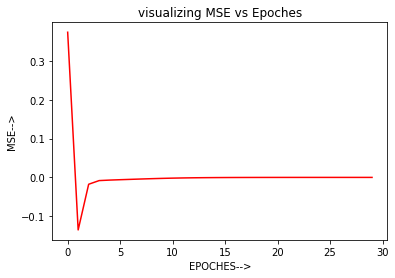

In [ ]:
import matplotlib.pyplot as plt
plt.plot(MSE,label='MSE',color='red')

#add label and titles
plt.title("visualizing MSE vs Epoches")
plt.xlabel("EPOCHES-->")
plt.ylabel("MSE-->")

In [ ]:
#visualizing traning result set
Y_train=Y_train.flatten()

*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2-D array with a single row if you intend to specify the same RGB or RGBA value for all points.
*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2-D array with a single row if you intend to specify the same RGB or RGBA value for all points.


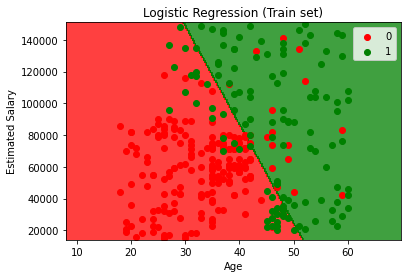

In [ ]:
#flatten y loaded data into 1D array
#keep same number of features for x as fited while traning the algorithm
from matplotlib.colors import ListedColormap
X_set, y_set = sst.inverse_transform(X_train), Y_train
X1, X2 = np.meshgrid(np.arange(start = X_set[:, 0].min() - 10, stop = X_set[:, 0].max() + 10, step = 0.25),np.arange(start = X_set[:, 1].min() - 1000, stop = X_set[:, 1].max() + 1000, step = 0.25))
plt.contourf(X1, X2, model.predict(sst.transform(np.array([X1.ravel(), X2.ravel()]).T)).reshape(X1.shape),alpha = 0.75, cmap = ListedColormap(('red', 'green')))
plt.xlim(X1.min(), X1.max())
plt.ylim(X2.min(), X2.max())
for i, j in enumerate(np.unique(y_set)):
  plt.scatter(X_set[y_set == j, 0], X_set[y_set == j, 1], c = ListedColormap(('red', 'green'))(i), label = j)
plt.title('Logistic Regression (Train set)')
plt.xlabel('Age')
plt.ylabel('Estimated Salary')
plt.legend()
plt.show()

In [ ]:
#visualizing traning result set
Y_test=Y_test.flatten()

*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2-D array with a single row if you intend to specify the same RGB or RGBA value for all points.
*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2-D array with a single row if you intend to specify the same RGB or RGBA value for all points.


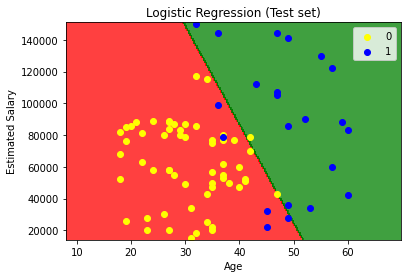

In [ ]:
#flatten y loaded data into 1D array
#keep same number of features for x as fited while traning the algorithm
from matplotlib.colors import ListedColormap
X_set, y_set = sst.inverse_transform(X_test), Y_test
X1, X2 = np.meshgrid(np.arange(start = X_set[:, 0].min() - 10, stop = X_set[:, 0].max() + 10, step = 0.25),np.arange(start = X_set[:, 1].min() - 1000, stop = X_set[:, 1].max() + 1000, step = 0.25))
plt.contourf(X1, X2, model.predict(sst.transform(np.array([X1.ravel(), X2.ravel()]).T)).reshape(X1.shape),alpha = 0.75, cmap = ListedColormap(('red', 'green')))
plt.xlim(X1.min(), X1.max())
plt.ylim(X2.min(), X2.max())
for i, j in enumerate(np.unique(y_set)):
  plt.scatter(X_set[y_set == j, 0], X_set[y_set == j, 1], c = ListedColormap(('yellow', 'blue'))(i), label = j)
plt.title('Logistic Regression (Test set)')
plt.xlabel('Age')
plt.ylabel('Estimated Salary')
plt.legend()
plt.show()